In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #resimler üzerinde çizim yapmak için
#çizim yapılan resimleri kaydetmek için
%matplotlib inline

In [9]:
def display(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [10]:
urun = cv2.imread('kahvaltilik.jpg',0)

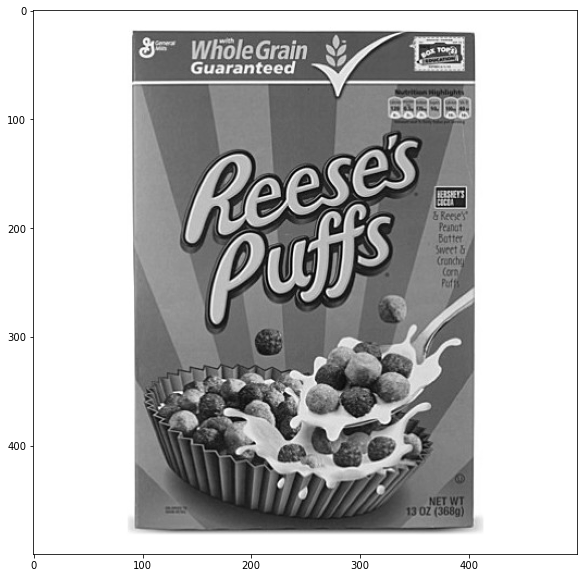

In [11]:
display(urun)

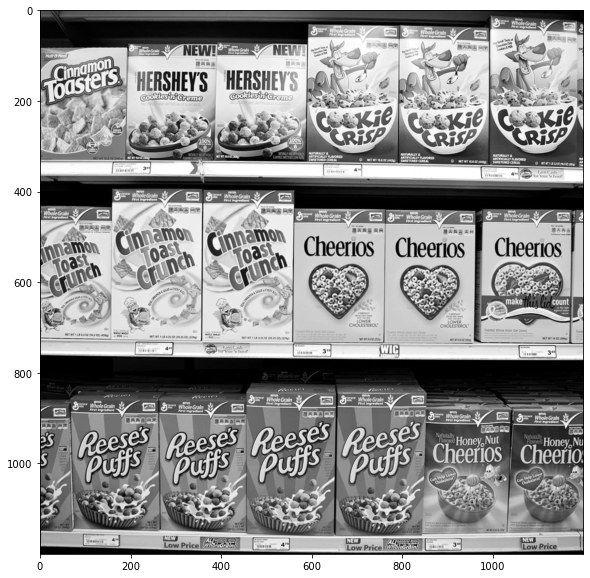

In [12]:
raf = cv2.imread('raf.jpg',0)
display(raf)

# Brute force detection with ORB descriptors

In [13]:
orb=cv2.ORB_create()

In [14]:
kp1, dest1= orb.detectAndCompute(urun,None)
kp2, dest2= orb.detectAndCompute(raf,None)

In [15]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [16]:
matches=bf.match(dest1,dest2)

In [17]:
matches= sorted(matches, key = lambda x:x.distance)

In [18]:
cizdirme=cv2.drawMatches(urun,kp1,raf,kp2,matches[:25],None,flags=2)

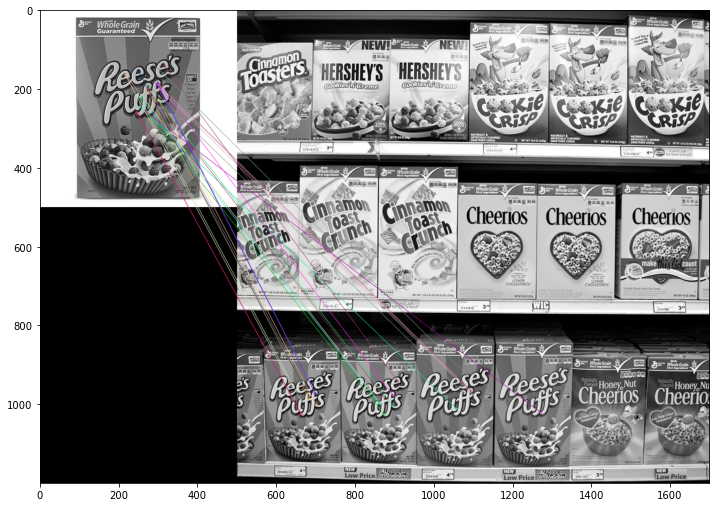

In [19]:
display(cizdirme)

# Daha iyi sonuç elde edebileceğimiz Brute-Fource Matching ile SIFT Descriptors ve Ratio Test

In [20]:
sift=cv2.xfeatures2d.SIFT_create()

In [23]:
kp1,dest1=sift.detectAndCompute(urun,None)
kp2,dest2=sift.detectAndCompute(raf,None)

In [24]:
#eşlenikleri belirleyelim
bf= cv2.BFMatcher()
matches = bf.knnMatch(dest1,dest2,k=2)

In [25]:
matches

((< cv2.DMatch 0000017E9C62BDB0>, < cv2.DMatch 0000017E9C89A270>),
 (< cv2.DMatch 0000017E9C79BD50>, < cv2.DMatch 0000017E9C8C9C70>),
 (< cv2.DMatch 0000017E9C8C9A10>, < cv2.DMatch 0000017E9D48DF30>),
 (< cv2.DMatch 0000017E9D48DFB0>, < cv2.DMatch 0000017E9D48DF50>),
 (< cv2.DMatch 0000017E9D48DCB0>, < cv2.DMatch 0000017E9D48DFD0>),
 (< cv2.DMatch 0000017E9D48DF90>, < cv2.DMatch 0000017E9D48DF70>),
 (< cv2.DMatch 0000017E9D48DF10>, < cv2.DMatch 0000017E9C891030>),
 (< cv2.DMatch 0000017E9C891050>, < cv2.DMatch 0000017E9C891070>),
 (< cv2.DMatch 0000017E9C891090>, < cv2.DMatch 0000017E9C8910B0>),
 (< cv2.DMatch 0000017E9C8910D0>, < cv2.DMatch 0000017E9C8910F0>),
 (< cv2.DMatch 0000017E9C891110>, < cv2.DMatch 0000017E9C891130>),
 (< cv2.DMatch 0000017E9C891150>, < cv2.DMatch 0000017E9C891170>),
 (< cv2.DMatch 0000017E9C891190>, < cv2.DMatch 0000017E9C8911B0>),
 (< cv2.DMatch 0000017E9C8911D0>, < cv2.DMatch 0000017E9C8911F0>),
 (< cv2.DMatch 0000017E9C891210>, < cv2.DMatch 0000017E9C89123

In [26]:
type(matches)

tuple

In [27]:
#en iyi eşlenik değerlerini good listesine ekleyeceğim
good=[]
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [37]:
cizdirme2=cv2.drawMatchesKnn(urun,kp1,raf,kp2,good,None,flags=2)

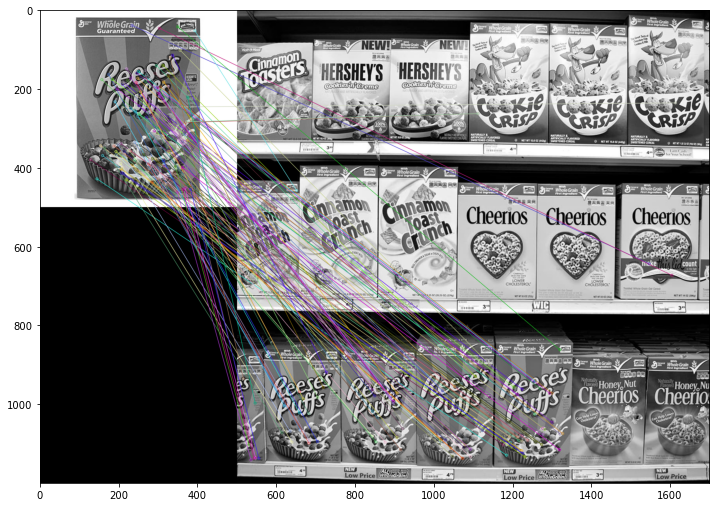

In [38]:
display(cizdirme2)

# FLANN based Matcher

In [30]:
sift=cv2.xfeatures2d.SIFT_create()

In [31]:
kp1,dest1=sift.detectAndCompute(urun,None)
kp2,dest2=sift.detectAndCompute(raf,None)

In [32]:
FLANN_INDEX_KDTREE=0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params=dict(checks=50)

In [33]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [34]:
matches = bf.knnMatch(dest1,dest2,k=2)

In [35]:
matches

((< cv2.DMatch 0000017E9D8F6D30>, < cv2.DMatch 0000017E9D8F6F30>),
 (< cv2.DMatch 0000017E9D8F6CD0>, < cv2.DMatch 0000017E9D8F69B0>),
 (< cv2.DMatch 0000017E9D8F6AB0>, < cv2.DMatch 0000017E9D8F6930>),
 (< cv2.DMatch 0000017E9C5787D0>, < cv2.DMatch 0000017E9C7A6E30>),
 (< cv2.DMatch 0000017E9C7A6810>, < cv2.DMatch 0000017E9C7A6EB0>),
 (< cv2.DMatch 0000017E9C7A6370>, < cv2.DMatch 0000017E9C7A6E10>),
 (< cv2.DMatch 0000017E9D48DE70>, < cv2.DMatch 0000017E9D48D2B0>),
 (< cv2.DMatch 0000017E9D48D550>, < cv2.DMatch 0000017E9D48D030>),
 (< cv2.DMatch 0000017E9D48D710>, < cv2.DMatch 0000017E9D48D790>),
 (< cv2.DMatch 0000017E9D48DDD0>, < cv2.DMatch 0000017E9D48DC50>),
 (< cv2.DMatch 0000017E9D48D2F0>, < cv2.DMatch 0000017E9D48D210>),
 (< cv2.DMatch 0000017E9D48D310>, < cv2.DMatch 0000017E9D48D390>),
 (< cv2.DMatch 0000017E9D48D690>, < cv2.DMatch 0000017E9D48DD70>),
 (< cv2.DMatch 0000017E9D641050>, < cv2.DMatch 0000017E9D641070>),
 (< cv2.DMatch 0000017E9D641090>, < cv2.DMatch 0000017E9D6410B

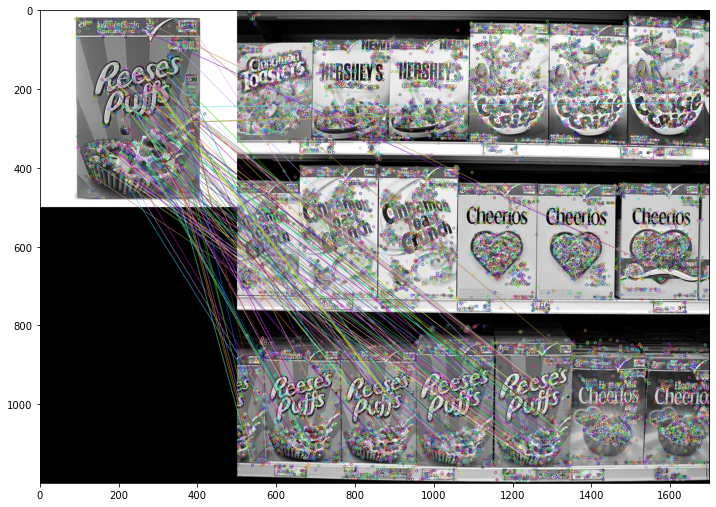

In [39]:
#en iyi eşlenik değerlerini good listesine ekleyeceğim
good=[]
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.70*match2.distance:
        good.append([match1])
cizdirme3=cv2.drawMatchesKnn(urun,kp1,raf,kp2,good,None,flags=0)
display(cizdirme3)

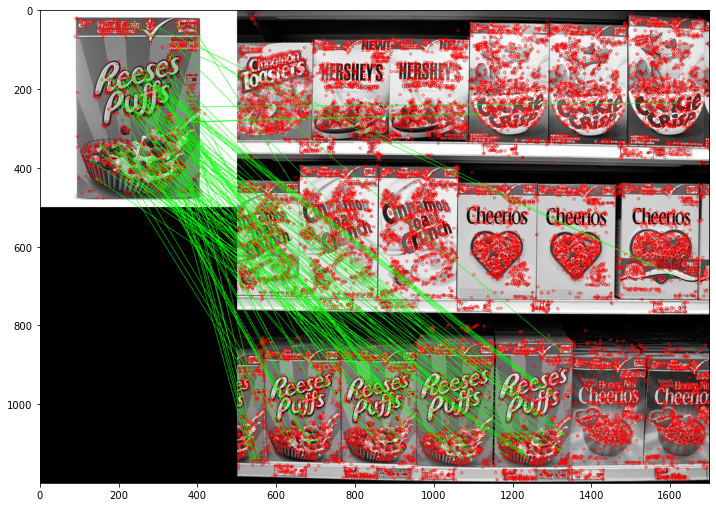

In [43]:
sift=cv2.xfeatures2d.SIFT_create() 

kp1,dest1=sift.detectAndCompute(urun,None)
kp2,dest2=sift.detectAndCompute(raf,None) 

FLANN_INDEX_KDTREE=0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params=dict(checks=50)

flann=cv2.FlannBasedMatcher(index_params,search_params)

matches = bf.knnMatch(dest1,dest2,k=2) 

matchesMask=[[0,0] for i in range(len(matches))]



#en iyi eşlenik değerlerini good listesine ekleyeceğim

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.70*match2.distance:
        matchesMask[i]= [1,0]
        
draw_params = dict(matchColor=(0,255,0), singlePointColor=(255,0,0), matchesMask=matchesMask,flags=0 )
cizdirme4=cv2.drawMatchesKnn(urun,kp1,raf,kp2,matches,None,**draw_params)
display(cizdirme4)